In [29]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [8]:
""" Your code hear: """
train = pd.read_csv("train.csv")
train.drop(columns="Id" ,inplace=True)
y = train["SalePrice"]

## 取出連續型特徵 (方便降維)

In [11]:
""" Your code hear: """
count = [ i for i in train.columns if train.dtypes[i] != "object"]

## 分析缺失值

<AxesSubplot:>

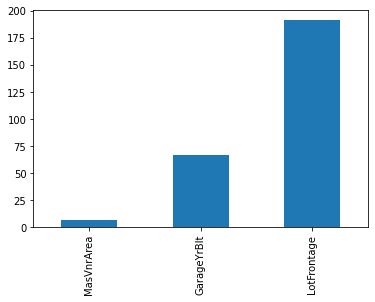

In [14]:
""" Your code hear: 練習印出缺失值圖表 """
mission= train[count].isnull().sum(axis=0).sort_values()
mission[mission>0].plot.bar()


## 去除缺失值

In [17]:
""" Your code hear: 去除缺失值 """
new_train = train[count].dropna(axis=1)
new_train.shape

(1095, 34)

## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [47]:
""" Your code hear: """
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(new_train.to_numpy())
y_label=pd.qcut(y ,[0, .25, .5, .75, 1.] ,labels=False)

## 利用 TSNE 降維

In [59]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)
#n_components 降到第幾維
#perplexity 困惑度 ， 5 ~ 50 之間
#learning_rate 最多做幾次，避免尋求局部最佳解
#early_exaggeration 前期放大係數
#n_iter 最大迭代次數 

## 做圖

<AxesSubplot:>

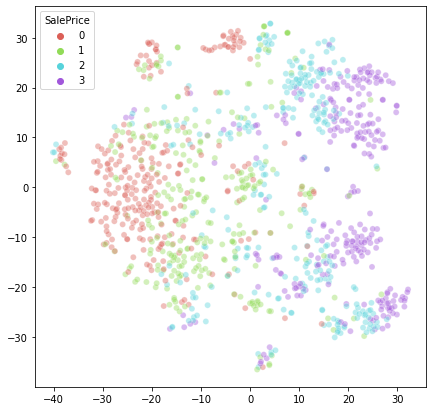

In [60]:
""" Your code hear: """
plt.figure(figsize=(7,7))
sns.scatterplot(x= X_tsne[:,0] , y = X_tsne[:,1] ,hue=y_label, alpha=0.4 , palette=sns.color_palette("hls", 4))


## 1. 請問同學從降維後的圖表中可以看出什麼現象？

資料相互的堆疊無明顯區分的界線

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？


可能是降維時，將可以區分的重要資料給丟失，導致點的座標重合性相當的高。